In [1]:
import pandas as pd

c:\Users\82106\anaconda3\lib\site-packages\pandas\core\computation\expressions.py:21: UserWarning: Pandas requires version '2.8.4' or newer of 'numexpr' (version '2.8.1' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED
c:\Users\82106\anaconda3\lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.4' currently installed).
  from pandas.core import (


In [17]:
merged_data = pd.read_csv('안산시 지역별 오염지수.csv', encoding='utf-8-sig')
merged_data

,동,음식물 폐기물 총무게,대형폐기물 관리주소 개수,토양오염 관리시설 개수,하천 점용 개수,토양 오염도 점수,폐수배출 종합점수,대기오염 종합점수,공장 개수
0,고잔동,3145708,132,3,0,0,0,0,20
1,대부동,5703940,560,12,0,0,0,0,5
2,반월동,1239451,92,5,1,0,1,0,90
3,백운동,2176200,106,0,0,0,0,0,0
4,본오동,2502583,301,4,0,0,0,0,141
5,부곡동,1739120,109,3,0,0,1,0,15
6,사동,5834368,232,7,0,0,3,2,47
7,선부동,4966509,183,9,0,0,1,0,12
8,성포동,2664230,22,42,0,8,0,0,0
9,안산동,147888,86,28,1,0,0,0,47


In [18]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# 1.데이터 전처리
def preprocess_data(df):
   
    # 수치형 컬럼만 선택
    numeric_cols = df.select_dtypes(include=[np.number]).columns
    X = df[numeric_cols].values
    
    # 표준화
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)
    
    return X_scaled, scaler, numeric_cols

# 데이터 전처리 함수 적용
X_scaled, scaler, numeric_cols = preprocess_data(merged_data)

# 스케일링된 데이터를 DataFrame으로 변환
scaled_df = pd.DataFrame(X_scaled, columns=numeric_cols)

# 동 이름을 추가
scaled_df['동'] = merged_data['동'].values

In [21]:
scaled_df

,음식물 폐기물 총무게,대형폐기물 관리주소 개수,토양오염 관리시설 개수,하천 점용 개수,토양 오염도 점수,폐수배출 종합점수,대기오염 종합점수,공장 개수,동
0,0.328619,-0.271057,-0.652270,-0.392837,-0.293295,-0.331221,-0.312171,-0.156605,고잔동
1,1.831032,3.276090,0.179374,-0.392837,-0.293295,-0.331221,-0.312171,-0.568298,대부동
2,-0.790898,-0.602567,-0.467460,0.942809,-0.293295,-0.247180,-0.312171,1.764630,반월동
3,-0.240759,-0.486538,-0.929485,-0.392837,-0.293295,-0.331221,-0.312171,-0.705529,백운동
4,-0.049079,1.129569,-0.559865,-0.392837,-0.293295,-0.331221,-0.312171,3.164387,본오동
5,-0.497450,-0.461675,-0.652270,-0.392837,-0.293295,-0.247180,-0.312171,-0.293836,부곡동
6,1.907630,0.557715,-0.282650,-0.392837,-0.293295,-0.079098,-0.191559,0.584443,사동
7,1.397949,0.151617,-0.097841,-0.392837,-0.293295,-0.247180,-0.312171,-0.376175,선부동
8,0.045854,-1.182708,2.951523,-0.392837,-0.254418,-0.331221,-0.312171,-0.705529,성포동
9,-1.431958,-0.652293,1.657854,0.942809,-0.293295,-0.331221,-0.312171,0.584443,안산동


In [ ]:
# PCA를 통한 오염지수 개발
def create_pollution_index_with_pca(scaled_df):

    # '동' 컬럼 제외하고 수치형 데이터만 사용
    X = scaled_df.drop('동', axis=1).values
    
    # PCA 적용 (주성분 개수는 데이터 분산의 95% 설명하도록)
    pca = PCA(n_components=0.95)
    X_pca = pca.fit_transform(X)

    # 첫 번째 주성분의 설명력이 가장 크므로 이를 기본으로 사용
    pollution_index = X_pca[:, 0]
    
    # 음수를 양수로 변환하고 0-100 스케일로 정규화
    pollution_index_normalized = (pollution_index - pollution_index.min()) / (pollution_index.max() - pollution_index.min()) * 100
    
    return pollution_index_normalized, pca, X_pca

# PCA 기반 오염지수 생성
pollution_index, pca_model, X_pca = create_pollution_index_with_pca(scaled_df)

# 결과를 DataFrame에 추가
result_df = scaled_df[['동']].copy()
result_df['PCA_오염지수'] = pollution_index

# 각 주성분의 설명력 확인
explained_variance_ratio = pca_model.explained_variance_ratio_
cumulative_variance_ratio = np.cumsum(explained_variance_ratio)

In [24]:
print("PCA 분석 결과:")
print(f"사용된 주성분 개수: {pca_model.n_components_}")
print(f"총 분산 설명력: {cumulative_variance_ratio[-1]:.3f}")
print(f"첫 번째 주성분 설명력: {explained_variance_ratio[0]:.3f}")

PCA 분석 결과:
사용된 주성분 개수: 5
총 분산 설명력: 0.966
첫 번째 주성분 설명력: 0.401


In [25]:
# 오염지수 결과 확인
result_df_sorted = result_df.sort_values('PCA_오염지수', ascending=False)
print("\nPCA 기반 오염지수 순위:")
print(result_df_sorted)


PCA 기반 오염지수 순위:
      동    PCA_오염지수
15  초지동  100.000000
11  원곡동   26.402230
1   대부동   25.062709
6    사동   20.745883
7   선부동   17.107198
0   고잔동   13.164399
4   본오동   12.264240
14   일동   12.187043
3   백운동   11.978511
16  호수동   11.374240
5   부곡동   11.108878
12  월피동   10.042558
10   와동    9.371247
8   성포동    5.896823
2   반월동    5.161088
9   안산동    0.841387
13   이동    0.000000


### 시각화

In [29]:
#한글폰트
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

# 한글 폰트 경로 설정
font_path = 'C:/Windows/Fonts/malgun.ttf'
font_name = fm.FontProperties(fname=font_path).get_name()
plt.rc('font', family=font_name)

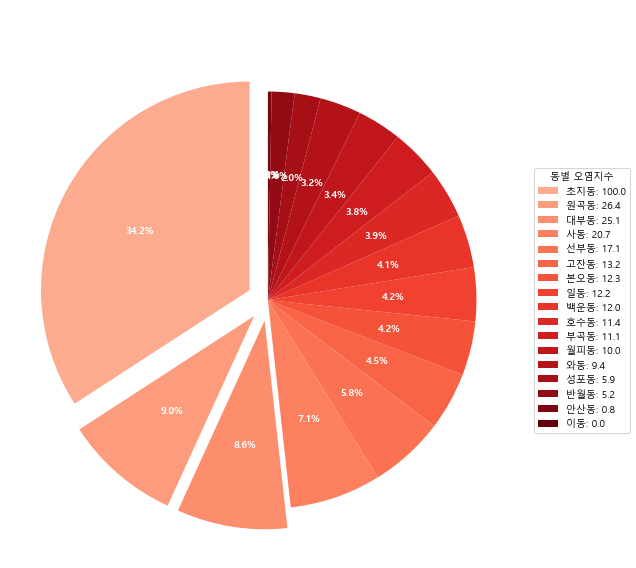

In [31]:
# PCA 기반 오염지수 파이차트 시각화
plt.figure(figsize=(12, 8))

# 오염지수 값들
values = result_df_sorted['PCA_오염지수'].values
labels = result_df_sorted['동'].values

# 색상 설정 (오염도에 따라 빨간색 계열로)
colors = plt.cm.Reds(np.linspace(0.3, 1, len(values)))

# 파이차트 생성
wedges, texts, autotexts = plt.pie(values, 
                                  labels=labels, 
                                  autopct='%1.1f%%',
                                  colors=colors,
                                  startangle=90,
                                  explode=[0.1 if i < 3 else 0 for i in range(len(values))])  # 상위 3개 강조

# 텍스트 스타일 설정
for autotext in autotexts:
    autotext.set_color('white')
    autotext.set_fontweight('bold')
    autotext.set_fontsize(10)

for text in texts:
    text.set_fontsize(11)
    text.set_fontweight('bold')
    text.set_color('white')  # 동 이름 텍스트를 흰색으로 변경

plt.title('동별 PCA 기반 오염지수 분포', fontsize=16, fontweight='bold', pad=20, color='white')  # 제목을 흰색으로 변경

# 범례 추가
plt.legend(wedges, [f'{dong}: {score:.1f}' for dong, score in zip(labels, values)],
          title="동별 오염지수",
          loc="center left",
          bbox_to_anchor=(1, 0, 0.5, 1))

plt.tight_layout()
plt.show()

In [27]:
# merged_data에 PCA 기반 오염지수 칼럼 추가
merged_data['PCA_오염지수'] = pollution_index
merged_data

,동,음식물 폐기물 총무게,대형폐기물 관리주소 개수,토양오염 관리시설 개수,하천 점용 개수,토양 오염도 점수,폐수배출 종합점수,대기오염 종합점수,공장 개수,PCA_오염지수
0,고잔동,3145708,132,3,0,0,0,0,20,13.164399
1,대부동,5703940,560,12,0,0,0,0,5,25.062709
2,반월동,1239451,92,5,1,0,1,0,90,5.161088
3,백운동,2176200,106,0,0,0,0,0,0,11.978511
4,본오동,2502583,301,4,0,0,0,0,141,12.264240
5,부곡동,1739120,109,3,0,0,1,0,15,11.108878
6,사동,5834368,232,7,0,0,3,2,47,20.745883
7,선부동,4966509,183,9,0,0,1,0,12,17.107198
8,성포동,2664230,22,42,0,8,0,0,0,5.896823
9,안산동,147888,86,28,1,0,0,0,47,0.841387
